In [1]:
import numpy as np
import pandas as pd

In [4]:
np.random.seed(23)

mu_vec1=np.array([0,0,0])
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample=np.random.multivariate_normal(mu_vec1,cov_mat1,20)

df=pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target']=1

mu_vec2=np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample=np.random.multivariate_normal(mu_vec2,cov_mat2,20)

df1=pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target']=0

df = pd.concat([df, df1], ignore_index=True)

df=df.sample(40)

In [5]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [10]:
import plotly.express as px

fig=px.scatter_3d(df,x=df['feature1'],y=df['feature2'],z=df['feature3'],color=df['target'].astype('str'),symbol=df['target'])

fig.show()

In [11]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df.iloc[:,0:3]=scaler.fit_transform(df.iloc[:,0:3])

In [13]:
covariance_matrix=np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print(f"Covariance matrix --> \n{covariance_matrix}")

Covariance matrix --> 
[[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [19]:
eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix)
print(f"eigen values: \n{eigen_values}")
print(f"\neigen vectors:\n {eigen_vectors}")

eigen values: 
[1.3536065  0.94557084 0.77774573]

eigen vectors:
 [[-0.53875915 -0.69363291  0.47813384]
 [-0.65608325 -0.01057596 -0.75461442]
 [-0.52848211  0.72025103  0.44938304]]


In [20]:
pc=eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [22]:
transformed_df=np.dot(df.iloc[:,0:3],pc.T)

newdf=pd.DataFrame(transformed_df,columns=['pc1','pc2'])
newdf['target']=df['target'].values
newdf.head()

,pc1,pc2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


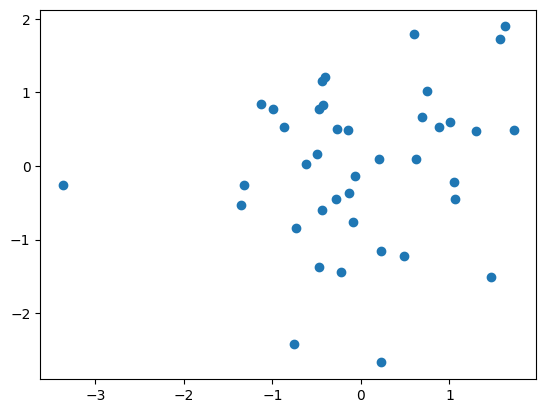

In [26]:
import matplotlib.pyplot as plt

plt.scatter(x=newdf['pc1'],y=newdf['pc2'])
plt.show()